In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix
%matplotlib inline

import itertools as it

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

#from lsq_code_soln import solve_linear_LS

__Exercise 1__ **(15 pt)** Use the SVD to numerically compute the p-dimensional PCA of the data matrix

$$ D=\left[\begin{array}{ccc}
4 & 1 & -2\\
-3 & 4 & -1\\
-4 & 0 & 1\\
2 & -2 & 3
\end{array}\right]$$
For each $p\in\left\{ 0,1,2\right\}$, report the resulting post-PCA data matrix (e.g., with mean added back in) and the error in the Frobenius norm.


In [5]:
# For Exercise 1 D matrix
# we have 3 data points, each data points has 4 features
# This is different from the next 3 Exercise questions
# MNIST dataset rows represent data points
# MNIST dataset 784 columns reprenset each data point's 1*28*28 = 784 features.


# Define matrix
D = np.array([[4,1,-2],[-3,4,-1],[-4,0,1],[2,-2,3]])

# Compute mean
########################################################
# m = D.mean(axis = 0) # Incrooect
m = D.mean(axis = 1) # Correct
print("Compute mean")
########################################################
print(m)

# Compute mean-corrected SVD
########################################################
A = D
A[:,0] = A[:,0] - m
A[:,1] = A[:,1] - m
A[:,2] = A[:,2] - m
# A = D - m
print("Compute A")
print(A)
########################################################
u, s, vh = np.linalg.svd(A,full_matrices=False)

# Print reconstruction for p=0,1,2
for p in range(3):
    ####################################################
    Up = u[:, 0:p+1]
    # A_recon = np.dot(Up, np.dot(Up.T, A)) + m
    A_recon = np.dot(Up, np.dot(Up.T, A))
    for i in range(0, 3) :
        A_recon[:,i] = A_recon[:,i] + m
    print("Reconstruction when p = " + str(p))
    ####################################################
    print(np.round(A_recon,2))

Compute mean
[ 1.  0. -1.  1.]
Compute A
[[ 3  0 -3]
 [-3  4 -1]
 [-3  1  2]
 [ 1 -3  2]]
Reconstruction when p = 0
[[ 2.83 -0.64  0.81]
 [-3.57  3.2   0.37]
 [-3.26  1.03 -0.76]
 [ 2.92 -0.72  0.8 ]]
Reconstruction when p = 1
[[ 4.  1. -2.]
 [-3.  4. -1.]
 [-4. -0.  1.]
 [ 2. -2.  3.]]
Reconstruction when p = 2
[[ 4.  1. -2.]
 [-3.  4. -1.]
 [-4. -0.  1.]
 [ 2. -2.  3.]]


#### MNIST

Read `mnist_train.csv`, create a dataframe with two columns, column `feature` contains all $x$ and column `label` contains all $y$.  Plot the first 30 images.

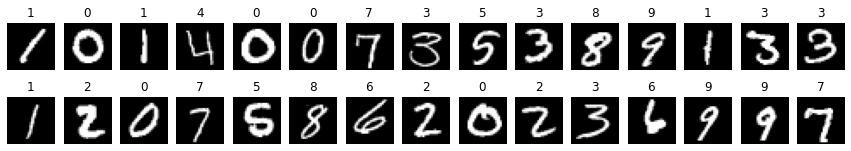

In [2]:
# read mnist csv file to a dataframe
df = pd.read_csv('mnist_train.csv')
# append feature column by merging all pixel columns
df['feature'] = df.apply(lambda row: row.values[1:], axis=1)
# only keep feature and label column
df = df[['feature', 'label']]
# display first 5 rows of the dataframe
df.head()

# Plot the first 30 images
plt.figure(figsize=(15, 2.5))
for i, row in df.iloc[:30].iterrows():
    x, y = row['feature'], row['label']
    plt.subplot(2, 15, i + 1)
    plt.imshow(x.reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(y)

__Exercise 2__ **(25 pt)** Use the steps outlined in Section 1.1 to solve the empirical PCA problem for the MNIST digit 2. Plot the first 36 reconstruction vectors (i.e., the first 36 columns of V or U in the SVD depending on orientation) as small MNIST images. How many of these look a lot like the digit 2?

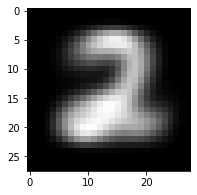

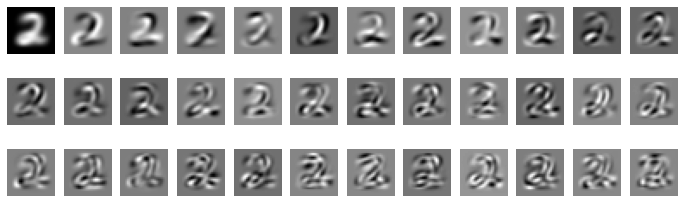

In [6]:
# Plot projections for digit 2

# Extract data points to rows of matrix
df_d = df[df['label']==2]
A = np.vstack(df_d['feature'].to_numpy())

# print(A.shape)
# (4177, 784)

# Compute and plot mean image
###################################################
m = A.mean(axis = 0)
# print(m.shape)
# (784,)
###################################################
plt.figure(figsize=(3,3))
plt.imshow(m.reshape(28, 28), cmap='gray')

# Compute mean-corrected SVD
#######################################################
# With mean removal
# u, s, vh = np.linalg.svd(A - m, full_matrices = False)

# Without mean removal
u, s, vh = np.linalg.svd(A, full_matrices = False)
#######################################################

# print(u.shape)
# (4177, 784)
# print(vh.shape)
# (784, 784)

# Plot the top 36 singular vectors for row space
plt.figure(figsize=(12, 5))
for i in range(36):
    #################################################
    # x = u[i]        # Does not look good.
    # x = vh[i, :]    # Looks good.
    # x = vh[:, i]    # Does not look good.
    
    x = vh[i, :]
    
    # print(x.shape)
    # (784,)
    #################################################
    plt.subplot(4, 12, i+1)
    plt.imshow(x.reshape(28, 28), cmap='gray')
    plt.axis('off')

__Exercise 3__ **(30 pt)** Do the following (separately) for each of the 10 digits in the given MNIST dataset:

1. Use the given samples to solve the empirical PCA problem with mean removal as outlined in Section 1.1

2. Use the given samples to solve the empirical PCA problem without mean removal (i.e., set $\underline{w}_{0}=\underline{0}$) using the steps in Section 1.2

3. Plot the first 12 image samples of this digit in three rows:   
    (a) the original image     
    (b) the image after projection onto p=3 dimensions (with mean removal)  
    (c) the image after projection onto p=4 dimensions (without mean removal)  

4. For the case without mean removal, plot the magnitude of the first 12 singular values in decreasing order using a logarithmic scale for the y-axis.

In [8]:
# Allocate list storage
A_mean = []

##############################################
# With mean correction
u_list = []
s_list = []
vh_list = []

# Without mean correction
u_wmc = []
s_wmc = []
vh_wmc = []
##############################################

# For each digit, compute svd and save
for d in range(10):
    # Get data
    df_d = df[df['label']==d]
    A = np.vstack(df_d['feature'].to_numpy())

    # Compute Mean
    A_mean.append(A.mean(axis = 0))
    
    # Compute SVD with mean correction
    u, s, vh = np.linalg.svd(A-A_mean[d],full_matrices=False)
    # Store results
    u_list.append(u)
    s_list.append(s)
    vh_list.append(vh)

    # Compute SVD without mean correction
    u, s, vh = np.linalg.svd(A,full_matrices=False)
    # Store results
    u_wmc.append(u)
    s_wmc.append(s)
    vh_wmc.append(vh)

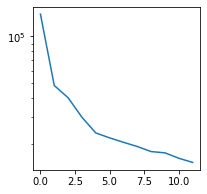

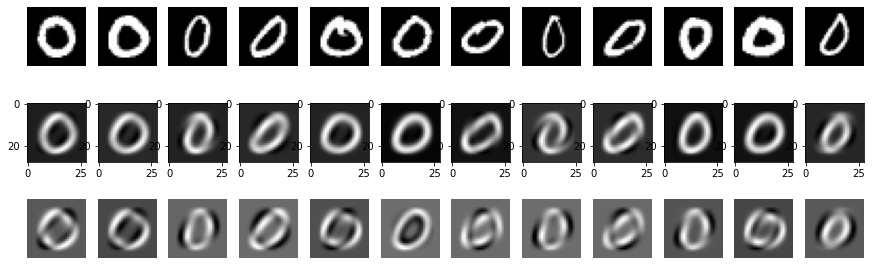

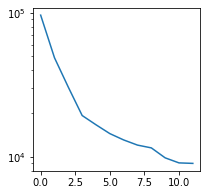

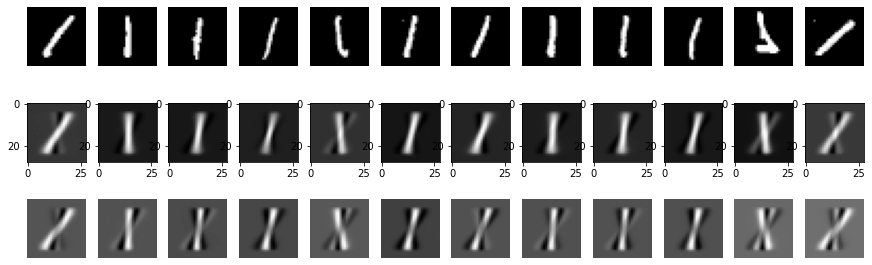

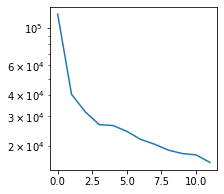

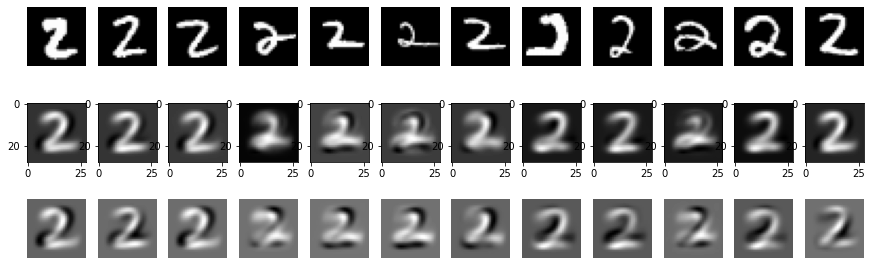

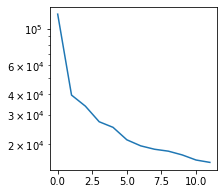

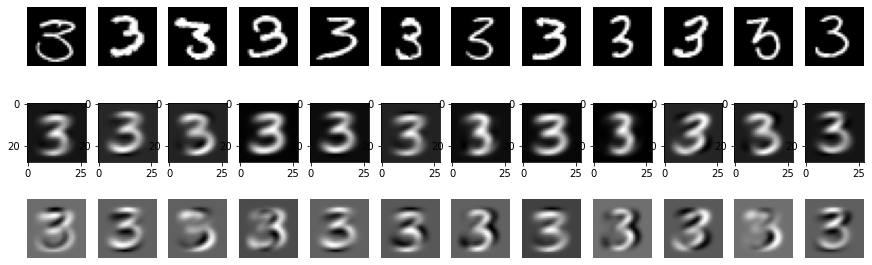

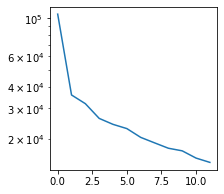

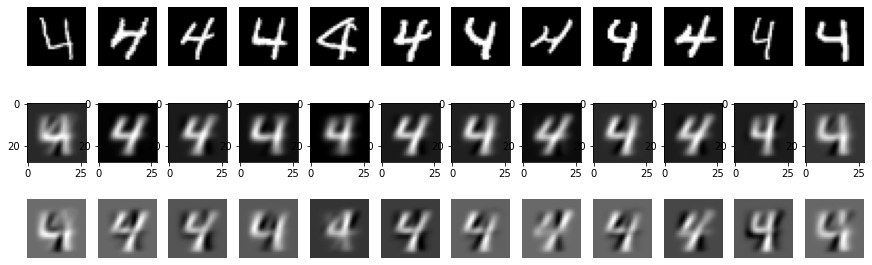

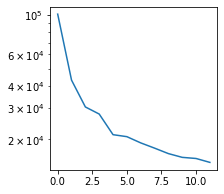

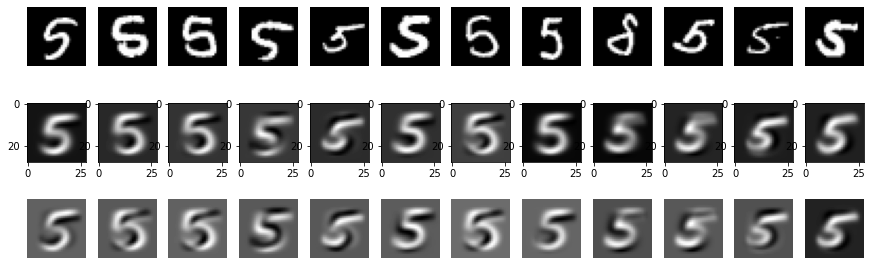

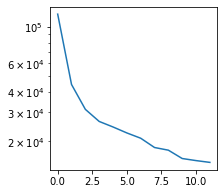

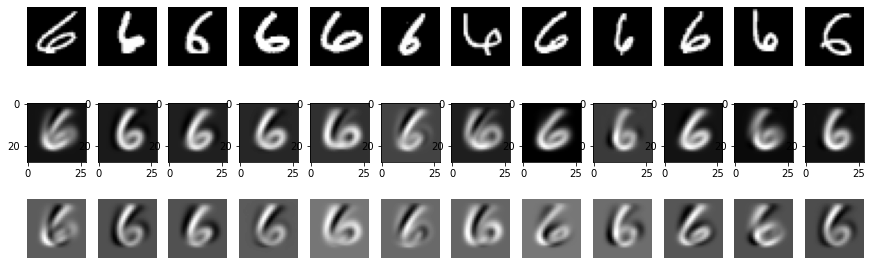

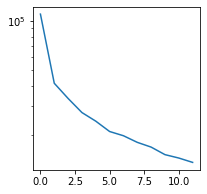

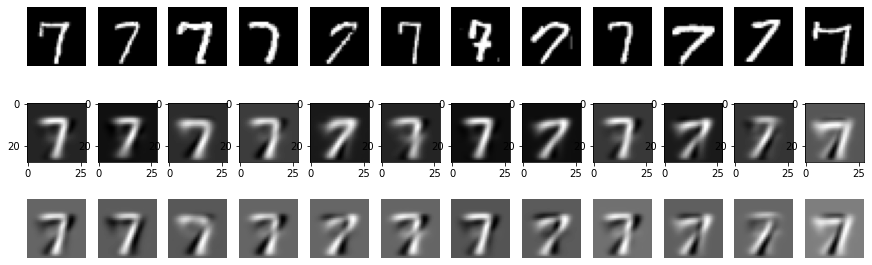

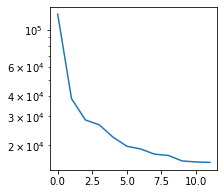

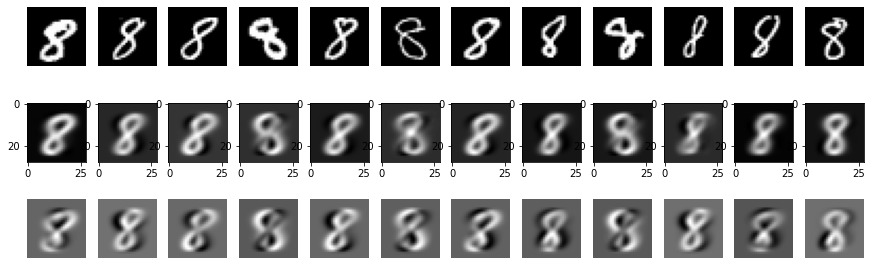

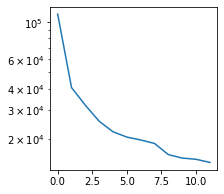

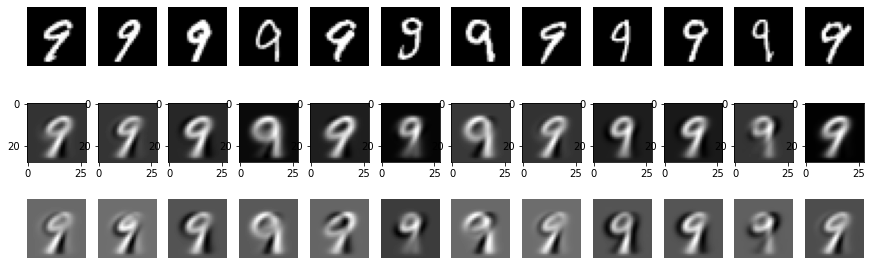

In [9]:
# For each digit, use plot svd to plot
for d in range(10):
    # Reconstruct with mean correction
    u = u_list[d]
    s = s_list[d]
    vh = vh_list[d]
    
    df_d = df[df['label']==d]
    A = np.vstack(df_d['feature'].to_numpy())
    
    Up = u[:, 0:3]
    Bm = np.dot(Up, np.dot(Up.T, A - A_mean[d])) + A_mean[d]

    # Reconstruct without mean correction
    u = u_wmc[d]
    s = s_wmc[d]
    vh = vh_wmc[d]
    
    t = np.zeros((u.shape[0], u.shape[1]))
    for j in range(0, 4) :
        t[:, j] = 1
    
    B = (u*t)@vh

    # Plot singular value decay without mean correction
    plt.figure(figsize=(3,3))
    plt.plot(s[:12])
    plt.yscale('log')

    # Plot the first 12 images for each case
    plt.figure(figsize=(15, 5))
    for i in range(12):
        x = A[i]
        plt.subplot(3, 12, i+1)
        plt.imshow(x.reshape(28, 28), cmap='gray')
        plt.axis('off')
        x = Bm[i]
        plt.subplot(3, 12, i + 13)
        plt.imshow(x.reshape(28, 28), cmap='gray')
        x = B[i]
        plt.subplot(3, 12, i + 25)
        plt.imshow(x.reshape(28, 28), cmap='gray')
        plt.axis('off')

__Exercise 4__
**(30 pt)** Repeat Exercise 6 of the Least Squares project after using PCA to reduce the dimension of the whole data set from $28\cdot28=784$ dimensions to 500 dimensions. How does the error rate compare to the results from the Least Squares project. 

In [10]:
def solve_linear_LS(A, y):
    """
    Arguments:
        A {numpy.ndarray} -- an m x n matrix
        y {numpy.ndarray} -- a length-m vector
    Returns:
        z_hat {numpy.ndarray} -- length-n vector, the optimal solution for the given linear least-square problem
    """
    # Add code to compute least squares solution z_hat via linear algebra
    #################################################################
    # The previous default of (-1) will use 
    # the machine precision times max(M, N).
    z_hat_tuple = np.linalg.lstsq(A, y, rcond = -1)
    z_hat = z_hat_tuple[0]
    #################################################################
    return z_hat

In [11]:
# Compute SVD dimension reduction of all MNIST data
A = np.vstack(df['feature'].to_numpy())
u, s, vh = np.linalg.svd(A,full_matrices=False)

# print(A.shape)
# (42000, 784)
# print(u.shape)
# (42000, 784)
# print(s.shape)
# (784,)
# print(vh.shape)
# (784, 784)

# t = np.zeros((vh.shape[0], vh.shape[1]))
# # Extract vh row space
# for i in range(0, 500) :
#     t[i, :] = 1
# # # Extract vh column space - Incorrect!
# # for j in range(0, 500) :
# #     t[:, i] = 1

# Q = vh * t

Q = vh[:,:500]

# Randomly split into training/testing set
test_size = 0.5
n, m = len(df), int(len(df) * test_size)
perm = np.random.permutation(n)
tr, te = df.iloc[perm[m:]], df.iloc[perm[:m]]

# Construct the training set
X_tr = np.vstack(tr['feature'].values)@Q
X_tr = np.hstack([X_tr, -np.ones((n - m, 1))])
y_tr = tr['label'].values

# Construct the testing set
X_te = np.vstack(te['feature'].values)@Q
X_te = np.hstack([X_te, -np.ones((m, 1))])
y_te = te['label'].values

# Apply one-hot encoding to training labels
Y = coo_matrix((np.ones(n-m), (np.arange(n-m), y_tr)),shape=(n-m, 10)).toarray()

# Run least-squares on training set
Z = solve_linear_LS(X_tr, Y)

# Compute estimate and error on training set
y_hat_tr = np.dot(X_tr, Z)
total_train = len(tr)
err_tr = np.sum(np.array([np.argmax(y_hat_tr, axis = 1) != y_tr])) / float(total_train)

# Compute estimate and error on training set
y_hat_te = np.dot(X_te, Z)
total_test = len(te)
err_te = np.sum(np.array([np.argmax(y_hat_te, axis = 1) != y_te])) / float(total_test)

print("-------------------------------------------------------------------")
print('training error = {0:.2f}%, testing error = {1:.2f}%'.format(100 * err_tr, 100 * err_te))
print("-------------------------------------------------------------------")

# Compute confusion matrix
cm_train = np.zeros((10, 10), dtype = np.int64)
cm_test = np.zeros((10, 10), dtype = np.int64)

y_pred_train = np.argmax(y_hat_tr, axis = 1)
y_pred_test = np.argmax(y_hat_te, axis = 1)

cm_train = confusion_matrix(y_true = y_tr, y_pred = y_pred_train)
cm_test = confusion_matrix(y_true = y_te, y_pred = y_pred_test)

print('Confusion matrix for Training Set is:\n {0}'.format(cm_train))
print("-------------------------------------------------------------------")
print('Confusion matrix for Test Set is:\n {0}'.format(cm_test))

# # Compute confusion matrix
# cm = np.zeros((10, 10), dtype=np.int64)
# for a in range(10):
#     for b in range(10):
#         cm[a, b] = ((y_te == a) & (y_hat_te == b)).sum()
# print('Confusion matrix:\n {0}'.format(cm))


-------------------------------------------------------------------
training error = 13.83%, testing error = 15.51%
-------------------------------------------------------------------
Confusion matrix for Training Set is:
 [[1975    1    7    7   16   18   26    3   19    2]
 [   0 2316   11    4    4    7    4    4   18    1]
 [  31   78 1671   54   37    5   87   40   85    6]
 [  11   62   62 1818   15   40   18   33   49   39]
 [   2   39   14    4 1783   15   14    7   19  106]
 [  54   36    5  167   39 1362   66   23   90   32]
 [  41   29   19    0   26   26 1963    0    9    0]
 [  15   64   16    8   54    5    3 1916    2   97]
 [  25  134   18   89   37   76   18    6 1597   56]
 [  24   19    3   40  135    5    0  155   14 1695]]
-------------------------------------------------------------------
Confusion matrix for Test Set is:
 [[1983    3    5    5    5   12   27    1   16    1]
 [   0 2242   13    9   10    7    8    3   21    2]
 [  34  104 1659   43   57    6   76 